# Geometric Transformations

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt
import plotly
from skimage import io
from skimage import morphology as morp
import plotly.express as px
import plotly.graph_objects as go

In [0]:
# !pip uninstall opencv-python -y
# # downgrade OpenCV a bit since some none-free features are not avilable
# !pip install opencv-contrib-python==3.4.2.17 --force-reinstall

In [0]:
# import basic functions
import numpy as np 
import cv2
import glob
import os 
import matplotlib.pyplot as plt

In [0]:
base_url = '/content/drive/My Drive/CVIT_WORKSHOP_2020/Day4'
url1 = base_url + '/Feature Matching'
url2 = base_url + '/Panorama'
url3 = base_url + '/Day4 Material'

In [0]:
rgb = lambda I: cv2.cvtColor(I, cv2.COLOR_BGR2RGB)

In [0]:
def histogram(I):
  fig = go.Figure()
  if len(I.shape) == 2:
    fig.add_trace(go.Histogram(x=I.ravel()))
    return fig
  for i in range(I.shape[2]):
    fig.add_trace(go.Histogram(x=I[:, :, i].ravel(), name= 'Channel: ' + str(i)))
  return fig

## Session 1

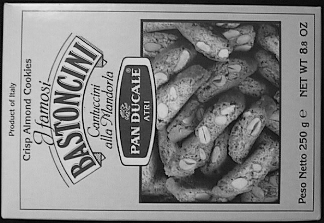

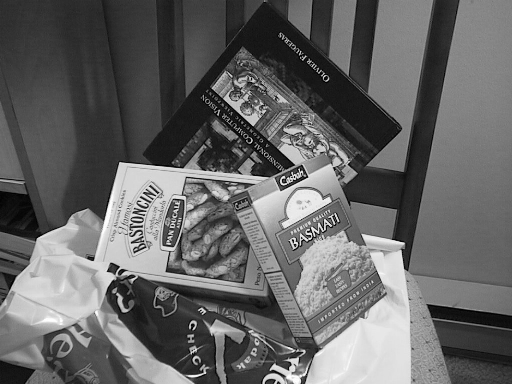

In [8]:
image1=cv2.imread(url1 + '/box.png',cv2.IMREAD_GRAYSCALE)
image2=cv2.imread(url1 + '/box_in_scene.png',cv2.IMREAD_GRAYSCALE)

cv2_imshow(image1)
cv2_imshow(image2)

In [0]:
# Initiate Sift detector
sift =cv2.xfeatures2d.SIFT_create()
kp1, des1 = sift.detectAndCompute(image1,None)
kp2, des2 = sift.detectAndCompute(image2,None)

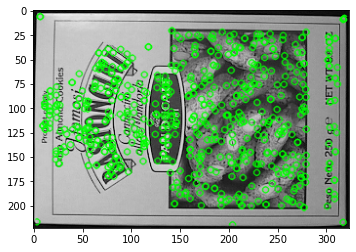

In [10]:
plt.imshow(cv2.drawKeypoints(image1,kp1,None,color=(0,255,0)))
# plt.imshow(cv2.drawKeypoints(image2,kp2,None,color=(0,255,0)))

### Exercise 1
Panorama and Feature Matching 

1. Take an image and a pixel location (15,15). Take the window size of 3,3 such that the pixel is located at the center of the window size. Now form a vector of 9 values which are just the intensities in that window. (Intensity of pixels :(14,14),(14,15),(14,16),(15,14),(15,15),(15,16),(16,14),(16,15),(16,16))
2. Extract Features from the images. 
3. Draw the lines between the matched features.
4. Create a Panorama with multiple Images.


In [11]:
img = image1[14: 17, 14: 17].ravel()
img

array([196, 195, 198, 196, 196, 199, 197, 196, 198], dtype=uint8)

Text(0.5, 0, '(b)')

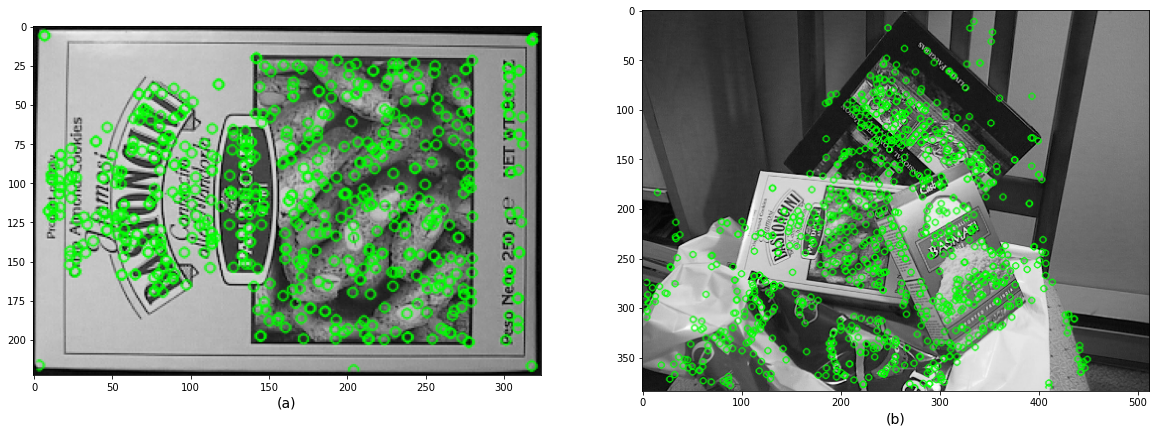

In [12]:
# display the keypoints and features detected on both images
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,8), constrained_layout=False)
ax1.imshow(cv2.drawKeypoints(image1,kp1,None,color=(0,255,0)))
ax1.set_xlabel("(a)", fontsize=14)
ax2.imshow(cv2.drawKeypoints(image2,kp2,None,color=(0,255,0)))
ax2.set_xlabel("(b)", fontsize=14)

[[<DMatch 0x7fd276911cb0>, <DMatch 0x7fd276911ab0>], [<DMatch 0x7fd276911b30>, <DMatch 0x7fd276911b70>], [<DMatch 0x7fd27636c430>, <DMatch 0x7fd27636c450>], [<DMatch 0x7fd27636c490>, <DMatch 0x7fd27636c6d0>], [<DMatch 0x7fd27636c210>, <DMatch 0x7fd27636c510>], [<DMatch 0x7fd27636c610>, <DMatch 0x7fd27636c4d0>], [<DMatch 0x7fd27636c570>, <DMatch 0x7fd27636c750>], [<DMatch 0x7fd27636c310>, <DMatch 0x7fd27636c290>], [<DMatch 0x7fd27636c1b0>, <DMatch 0x7fd27636c650>], [<DMatch 0x7fd27636c1d0>, <DMatch 0x7fd27636c050>], [<DMatch 0x7fd27636c470>, <DMatch 0x7fd27636c630>], [<DMatch 0x7fd27636c0f0>, <DMatch 0x7fd27636c110>], [<DMatch 0x7fd27636c070>, <DMatch 0x7fd27636c710>], [<DMatch 0x7fd27636c3f0>, <DMatch 0x7fd27636c6b0>], [<DMatch 0x7fd27636c3d0>, <DMatch 0x7fd27636c5f0>], [<DMatch 0x7fd27636c770>, <DMatch 0x7fd27636c730>], [<DMatch 0x7fd27636c6f0>, <DMatch 0x7fd27636c670>], [<DMatch 0x7fd27636c790>, <DMatch 0x7fd27636c7b0>], [<DMatch 0x7fd27636c7d0>, <DMatch 0x7fd27636c7f0>], [<DMatch 0x

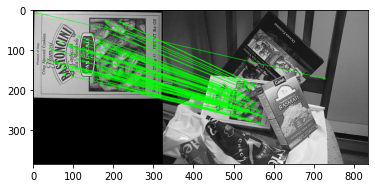

In [13]:
match = cv2.BFMatcher()
matches = match.knnMatch(des1,des2,k=2)

print(matches)

good = []
for m,n in matches:
    if m.distance < 0.7*n.distance:
        good.append(m)

draw_params = dict(matchColor=(0,255,0),
                       singlePointColor=None,
                       flags=2)

img3 = cv2.drawMatches(image1,kp1,image2,kp2,good,None,**draw_params)
plt.imshow(img3)

In [0]:
image1=cv2.imread(url2 + '/Eg1/img2_2.png')
image2=cv2.imread(url2 + '/Eg1/img2_1.png')

image1_gray=cv2.cvtColor(image1,cv2.COLOR_BGR2GRAY)
image2_gray=cv2.cvtColor(image2,cv2.COLOR_BGR2GRAY)

image1=cv2.cvtColor(image1,cv2.COLOR_BGR2RGB)
image2=cv2.cvtColor(image2,cv2.COLOR_BGR2RGB)

In [0]:
# # find the keypoints and descriptors with ORB
# kp1, des1 = orb.detectAndCompute(image1_gray,None)
# kp2, des2 = orb.detectAndCompute(image2_gray,None)

In [0]:
# Initiate Sift detector
sift =cv2.xfeatures2d.SIFT_create()
kp1, des1 = sift.detectAndCompute(image1_gray,None)
kp2, des2 = sift.detectAndCompute(image2_gray,None)

Text(0.5, 0, '(b)')

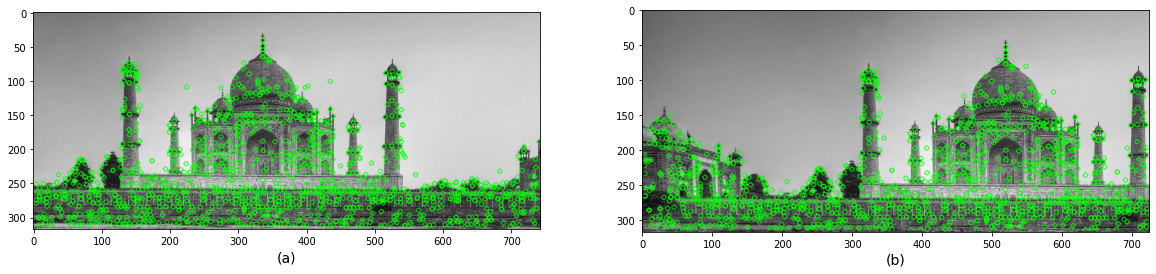

In [17]:
# display the keypoints and features detected on both images
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,8), constrained_layout=False)
ax1.imshow(cv2.drawKeypoints(image1_gray,kp1,None,color=(0,255,0)))
ax1.set_xlabel("(a)", fontsize=14)
ax2.imshow(cv2.drawKeypoints(image2_gray,kp2,None,color=(0,255,0)))
ax2.set_xlabel("(b)", fontsize=14)

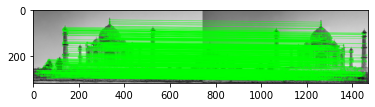

In [18]:
match = cv2.BFMatcher()
matches = match.knnMatch(des1,des2,k=2)

good = []
for m,n in matches:
    if m.distance < 0.03*n.distance:
        good.append(m)

draw_params = dict(matchColor=(0,255,0),
                       singlePointColor=None,
                       flags=2)

img3 = cv2.drawMatches(image1_gray,kp1,image2_gray,kp2,good,None,**draw_params)
plt.imshow(img3)

In [0]:
MIN_MATCH_COUNT = 10
if len(good) > MIN_MATCH_COUNT:
    src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)

    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

    h,w = image2_gray.shape
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    dst = cv2.perspectiveTransform(pts, M)
    #img2 = cv2.polylines(image2,[np.int32(dst)],True,255,3, cv2.LINE_AA)

    #plt.imshow(img2)
else:
    print("Not enought matches are found - %d/%d", (len(good)/MIN_MATCH_COUNT))

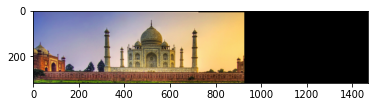

In [20]:
dst = cv2.warpPerspective(image1,M,(image2.shape[1] + image1.shape[1], image2.shape[0]))
dst[0:image2.shape[0],0:image2.shape[1]] = image2
plt.imshow(dst)



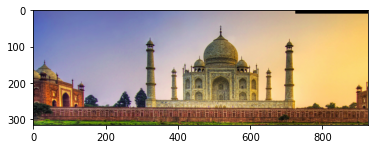

In [21]:
def trim(frame):
    #crop top
    if not np.sum(frame[0]):
        return trim(frame[1:])
    #crop bottom
    if not np.sum(frame[-1]):
        return trim(frame[:-2])
    #crop left
    if not np.sum(frame[:,0]):
        return trim(frame[:,1:])
    #crop right
    if not np.sum(frame[:,-1]):
        return trim(frame[:,:-2])
    return frame

plt.imshow(trim(dst))
#cv2.imsave("original_image_stitched_crop.jpg", trim(dst))

In [0]:
def trim(frame):
          #crop top
          if not np.sum(frame[0]):
              return trim(frame[1:])
          #crop bottom
          if not np.sum(frame[-1]):
              return trim(frame[:-2])
          #crop left
          if not np.sum(frame[:,0]):
              return trim(frame[:,1:])
          #crop right
          if not np.sum(frame[:,-1]):
              return trim(frame[:,:-2])
          return frame

def panorama(path_right,path_left,thres):

      image1=cv2.imread(path_right)
      image2=cv2.imread(path_left)

      image1_gray=cv2.cvtColor(image1,cv2.COLOR_BGR2GRAY)
      image2_gray=cv2.cvtColor(image2,cv2.COLOR_BGR2GRAY)

      image1=cv2.cvtColor(image1,cv2.COLOR_BGR2RGB)
      image2=cv2.cvtColor(image2,cv2.COLOR_BGR2RGB)

      # Initiate Sift detector
      sift =cv2.xfeatures2d.SIFT_create()
      kp1, des1 = sift.detectAndCompute(image1_gray,None)
      kp2, des2 = sift.detectAndCompute(image2_gray,None)

      # display the keypoints and features detected on both images
      #fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,8), constrained_layout=False)
      #ax1.imshow(cv2.drawKeypoints(image1_gray,kp1,None,color=(0,255,0)))
      #ax1.set_xlabel("(a)", fontsize=14)
      #ax2.imshow(cv2.drawKeypoints(image2_gray,kp2,None,color=(0,255,0)))
      #ax2.set_xlabel("(b)", fontsize=14)

      match = cv2.BFMatcher()
      matches = match.knnMatch(des1,des2,k=2)

      good = []
      for m,n in matches:
          if m.distance < 0.7*n.distance:
              good.append(m)

      draw_params = dict(matchColor=(0,255,0),
                            singlePointColor=None,
                            flags=2)

      img3 = cv2.drawMatches(image1_gray,kp1,image2_gray,kp2,good,None,**draw_params)
      #plt.imshow(img3)

      MIN_MATCH_COUNT = thres
      if len(good) > MIN_MATCH_COUNT:
          src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
          dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)

          M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

          h,w = image2_gray.shape
          pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
          dst = cv2.perspectiveTransform(pts, M)
          #img2 = cv2.polylines(image2,[np.int32(dst)],True,255,3, cv2.LINE_AA)

          #plt.imshow(img2)
      else:
          print("Not enought matches are found - %d/%d", (len(good)/MIN_MATCH_COUNT))

      dst = cv2.warpPerspective(image1,M,(image2.shape[1] + image1.shape[1], image2.shape[0]+ image1.shape[0]))
      dst[0:image2.shape[0],0:image2.shape[1]] = image2
      #plt.imshow(dst)

      
      plt.imshow(trim(dst))
      #cv2.imsave("original_image_stitched_crop.jpg", trim(dst))
      return(trim(dst))

In [0]:
def pano(eg,thres):
  root=url2 + '/' + eg + '/'
  images=os.listdir(root)
  save_path=url2 + '/Outputs/' + eg + '/'
  for i in range (len(images)-1):
    path_right=root+images[i+1] 
    if i==0:
      path_left=root+images[i]
    else:
      path_left=save_image
    img_new=panorama(path_right,path_left,thres)
    save_image=save_path+images[i+1][:-4]+"output.png"
    cv2.imwrite(save_image, cv2.cvtColor(img_new, cv2.COLOR_RGB2BGR))
    cv2_imshow(img_new)

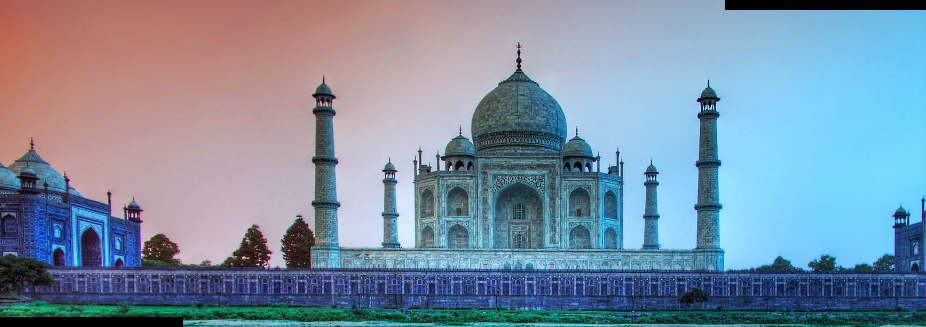

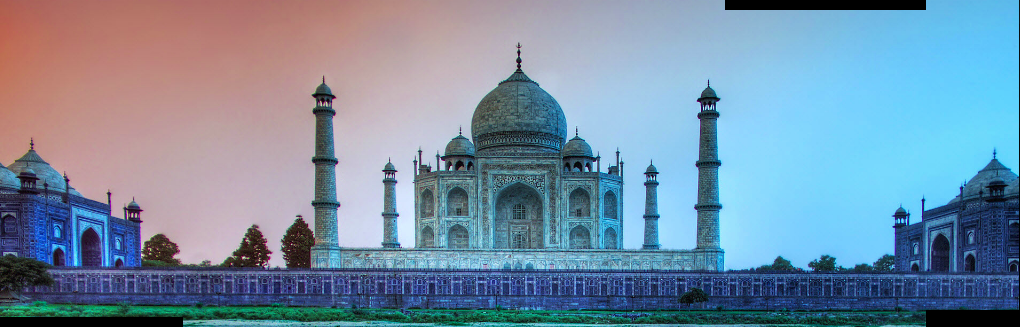

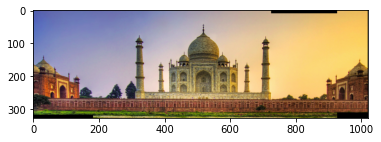

In [36]:
pano('Eg1',10)

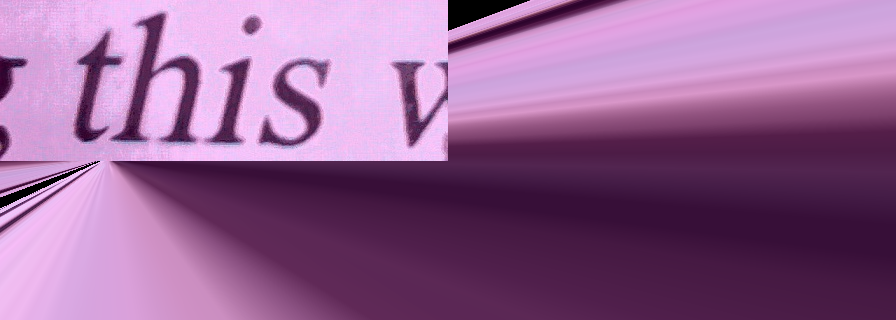

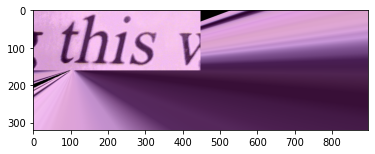

In [37]:
pano('Eg3',3)

### **HW 1**
Add the results and observation for the three textures:
1. Images captured by your phone of any view. 
2. Homogeneous or a simple flat patch with uniform color (may be a pic of your wall).
3. Images containing the source of light (pic of sun  or your tubelight.)
4. Images taken by low light vision (pics clicked in a dark room)


## Session 2

### **Task 1** 

**Persepective Rectification**

Map the book in the image to a rectangular window of width=400 and height=400.
Function for homography- cv2.findHomography(pts_src, pts_dst)


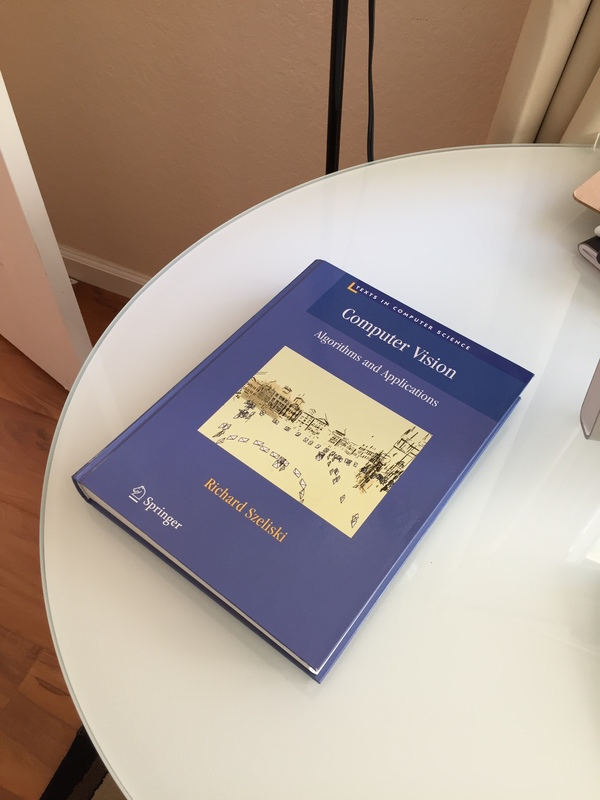

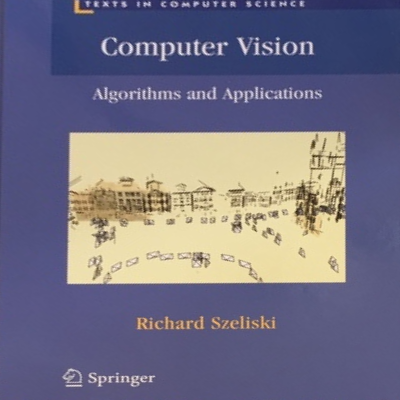

In [24]:
I = cv2.imread(url3 + '/book1.jpg')
cv2_imshow(I)

height, width = 400, 400
dst_pts = np.array([[0, 0], [width-1, 0], [width-1,height-1], [0,height-1]])
src_pts = np.load(url3 + '/Points.npy')

H, status = cv2.findHomography(src_pts, dst_pts) 
im_dst = cv2.warpPerspective(I, H, (width, height))

cv2_imshow(im_dst)

### **Task 2**

**Image Alignment**

Align the book in the book1.jpg to the book in the book2.jpg

pts_src = np.array([[141, 131], [480, 159], [493, 630],[64, 601]], dtype=float)

pts_dst = np.array([[318, 256],[534, 372],[316, 670],[73, 473]], dtype=float)


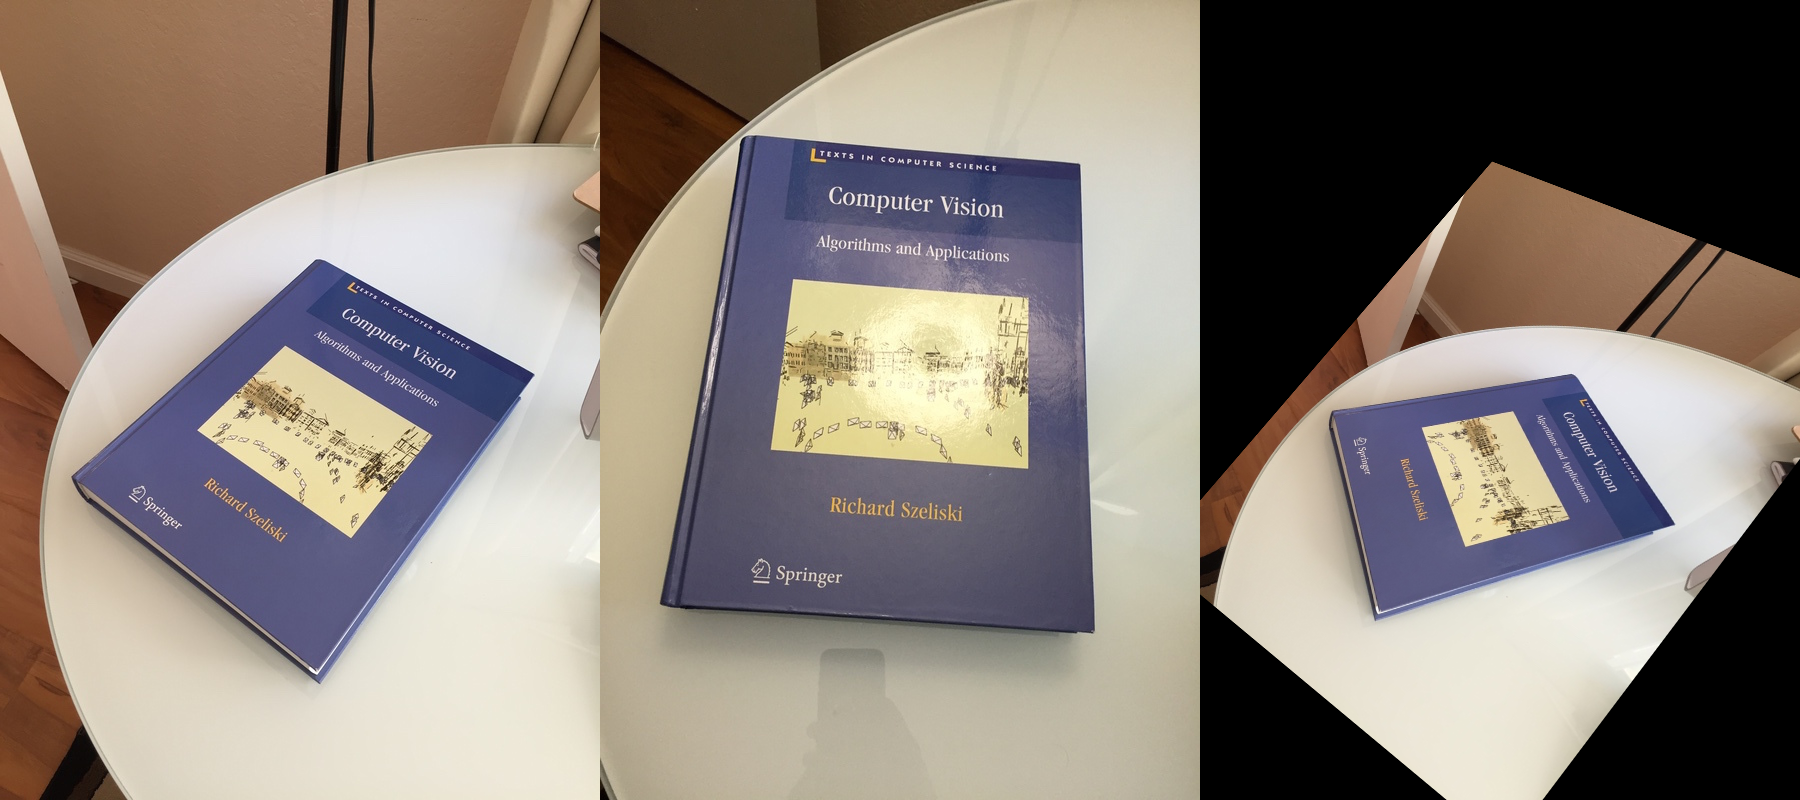

In [25]:
img1 = cv2.imread(url3 + '/book1.jpg')
img2 = cv2.imread(url3 + '/book2.jpg')

src_pts = np.array([[141, 131], [480, 159], [493, 630], [64, 601]], dtype=float)
dst_pts = np.array([[318, 256], [534, 372], [316, 670], [73, 473]], dtype=float)

H, status = cv2.findHomography(src_pts, dst_pts) 
im_dst = cv2.warpPerspective(img1, H, (img2.shape[1], img2.shape[0]))

cv2_imshow(np.hstack([img1, img2, im_dst]))

### **Task 3**
You can take tsukuba_l and tsukuba_r images from the drive link and use 

cv2.StereoBM_create(numDisparities=16, blockSize=15) to get disparity map

After getting the disparity map try to remove objects from the image whose disparity is  less  than a  particular threshold say 120.


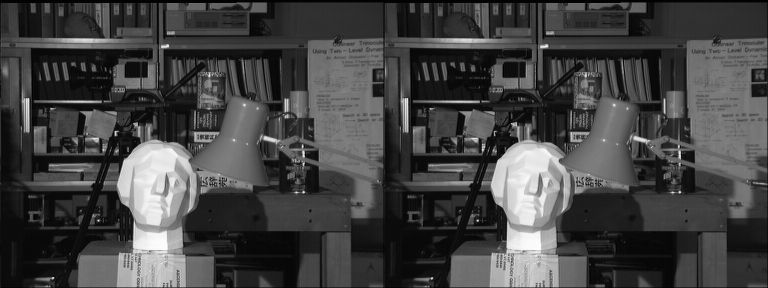

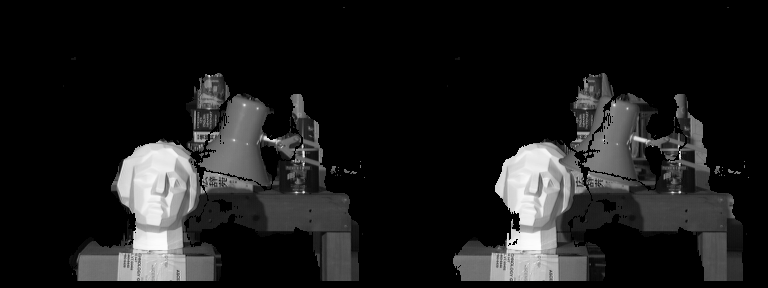

In [26]:
imgL = cv2.imread(url3 + '/tsukuba_l.png', 0)  # 0 for cv2.IMREAD_GRAYSCALE
imgR = cv2.imread(url3 + '/tsukuba_r.png', cv2.IMREAD_GRAYSCALE)

cv2_imshow(np.hstack([imgL, imgR]))

stereo = cv2.StereoBM_create(numDisparities=16, blockSize=15)
disparity = stereo.compute(imgL, imgR)

threshold = 120
limg = np.where(disparity < threshold, 0, imgL)
rimg = np.where(disparity < threshold, 0, imgR)

cv2_imshow(np.hstack([limg, rimg]))

### **Task 4**
You can take the view0.png and view1.png from the link and perform the SSD based patch matching to get the disparity map.

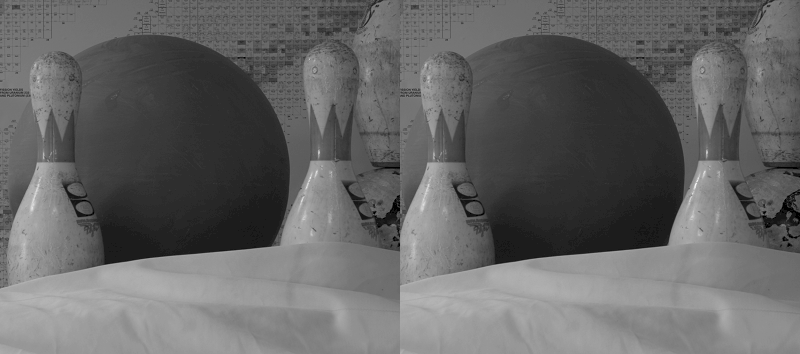

In [27]:
img1 = cv2.imread(url3 + '/view0.png', 0)
img2 = cv2.imread(url3 + '/view1.png', 0)

cv2_imshow(np.hstack([img1, img2]))

In [0]:
def padding(I, mask):
  img = np.zeros((I.shape[0]+mask[0]-(mask[0]%2), I.shape[1]+mask[1]-(mask[1]%2)))
  img[mask[0]//2:img.shape[0]-mask[0]//2, mask[1]//2:img.shape[1]-mask[1]//2] = I[:]
  return img

def SSD(img1, img2, x, y, k, mask):
  x1, x2 = x-mask[0]//2, x+1+mask[0]//2
  y1, y2 = y-mask[1]//2, y+1+mask[1]//2
  y3, y4 = k-mask[1]//2, k+1+mask[1]//2
  return np.sum(np.square(img1[x1:x2,y1:y2] - img2[x1:x2,y3:y4]))

def disparity_map(I1, I2, mask):
  img1 = padding(I1, mask)
  img2 = padding(I2, mask)
  disparity = np.zeros((I1.shape[0], I1.shape[1]))
  for x in range(I1.shape[0]):
    for y in range(I1.shape[1]):
      best_k = -1
      cost = -1
      for k in range(I1.shape[1]):
        ssd = SSD(img1, img2, x+mask[0]//2, y+mask[1]//2, k+mask[1]//2, mask)
        if cost == -1 or ssd < cost:
          cost = ssd
          best_k = k
      disparity[x][y]  = y - k
  return disparity

In [0]:
# disparityMap = disparity_map(img1, img2, (3, 3))
# np.save(base_url + '/disparity_map.npy', disparityMap)

In [30]:
stereo = cv2.StereoBM_create(numDisparities=16, blockSize=15)
disparity1 = stereo.compute(img1, img2)
disparity2 = np.load(base_url + '/disparity_map.npy')

histogram(disparity1.astype('int')).show()
histogram(disparity2.astype('int')).show()

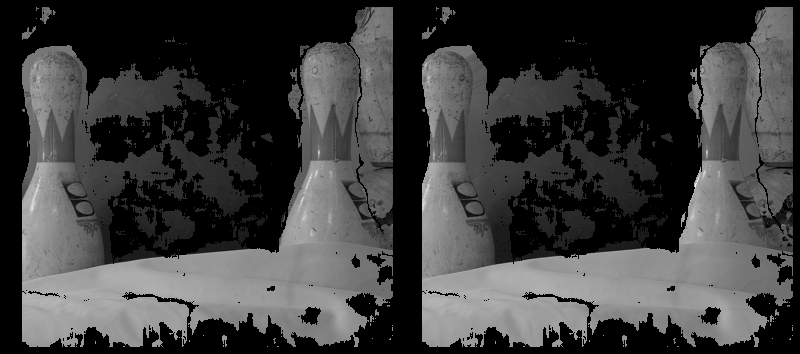

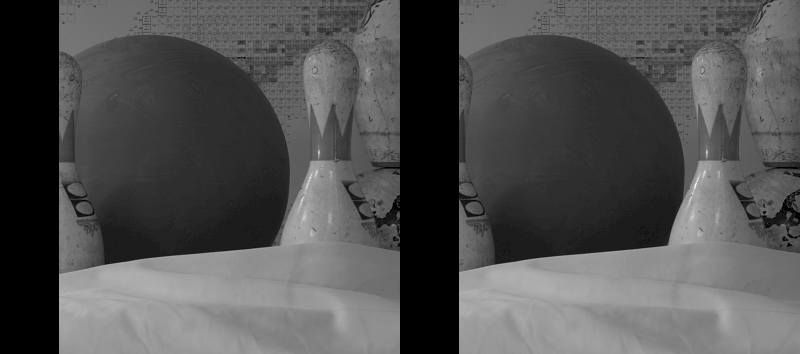

In [31]:
threshold1 = 120
threshold2 = -340

img3_1 = np.where(disparity1 < threshold1, 0, img1)
img3_2 = np.where(disparity1 < threshold1, 0, img2)
img4_1 = np.where(disparity2 < threshold2, 0, img1)
img4_2 = np.where(disparity2 < threshold2, 0, img2)

cv2_imshow(np.hstack([img3_1, img3_2]))
cv2_imshow(np.hstack([img4_1, img4_2]))